# Exploratory data analysis: unemployment data vs voting patterns

**Summary:** 

I find a positive correlation between unemployment data and share of the FN vote in 2015, by department, with Spearman's correlation test. From a fundamental investing perspective, this could be helpful to understand macroeconomic and political perspectives surrounding the the rise of the far-right. 

I further extend this work to the recent presidential election in 2017 to show that Le Pen's support is strongest where unemployment is higher. 

I provide a visualization of this on the French map using the folium library. You will have to install [folium](https://github.com/python-visualization/folium) on your local environment to view the four maps below. 

I also use the fuzzywuzzy library to match department names & codes across different datasets. 


## Imports

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from datetime import datetime
from fuzzywuzzy import process
from scipy import stats
import json
import folium

In [18]:
#data from INSEE website 

unemploymentD=pd.read_csv("../data/values.csv", sep=';',encoding="latin-1",skiprows=[2])
unemploymentD.head()

Title  Unnamed: 1  Unemployment rates localized by department - Aveyron  \
0  IdBank         NaN                                          1515862.0      
1    2016         4.0                                                7.3      
2    2016         3.0                                                7.4      
3    2016         2.0                                                7.3      
4    2016         1.0                                                7.4      

   Unemployment rates localized by department - Ain  \
0                                         1515866.0   
1                                               7.3   
2                                               7.4   
3                                               7.3   
4                                               7.3   

   Unemployment rates localized by department - Aisne  \
0                                          1515867.0    
1                                               13.7    
2                                               13.8    
3                                               13.5    
4                                               13.8    

   Unemployment rates localized by department - Allier  \
0                                          1515868.0     
1                                               10.4     
2                                               10.6     
3                                               10.4     
4                                               10.6     

   Unemployment rates localized by department - Alpes-de-Haute-Provence  \
0                                          1515869.0                      
1                                               11.6                      
2                                               11.6                      
3                                               11.3                      
4                                               11.7                      

   Unemployment rates localized by department - Hautes-Alpes  \
0                                          1515870.0           
1                                                9.1           
2                                                9.2           
3                                                9.0           
4                                                9.3           

   Unemployment rates localized by department - Alpes-Maritimes  \
0                                          1515871.0              
1                                               10.6              
2                                               10.5              
3                                               10.3              
4                                               10.7              

   Unemployment rates localized by department - Ardèche  \
0                                          1515872.0      
1                                               10.7      
2                                               10.9      
3                                               10.6      
4                                               10.7      

                         ...                         \
0                        ...                          
1                        ...                          
2                        ...                          
3                        ...                          
4                        ...                          

   Unemployment rates localized by department - Haute-Vienne  \
0                                          1515951.0           
1                                                9.4           
2                                                9.6           
3                                                9.6           
4                                                9.8           

   Unemployment rates localized by department - Vosges  \
0                                          1515952.0     
1                                               10.7     
2                     

##### Clean column titles using regex

In [36]:
namesofplaces=(unemploymentD.columns.unique())

In [49]:
regionlist=[]
for i in range(2,len(unemploymentD.columns.unique())):
        regionlist.append(namesofplaces[i].split(' ',6)[6])
print(len(regionlist), regionlist)

96 ['Aveyron', 'Ain', 'Aisne', 'Allier', 'Alpes-de-Haute-Provence', 'Hautes-Alpes', 'Alpes-Maritimes', 'Ardèche', 'Ardennes', 'Ariège', 'Aube', 'Aude', 'Bouches-du-Rhône', 'Calvados', 'Cantal', 'Charente', 'Charente-Maritime', 'Cher', 'Corrèze', 'Corse-du-Sud', 'Haute-Corse', "Côte-d'Or", "Côtes-d'Armor", 'Creuse', 'Dordogne', 'Doubs', 'Drôme', 'Eure', 'Eure-et-Loir', 'Finistère', 'Gard', 'Haute-Garonne', 'Gers', 'Gironde', 'Hérault', 'Ille-et-Vilaine', 'Indre', 'Indre-et-Loire', 'Isère', 'Jura', 'Landes', 'Loir-et-Cher', 'Loire', 'Haute-Loire', 'Loire-Atlantique', 'Loiret', 'Lot', 'Lot-et-Garonne', 'Lozère', 'Maine-et-Loire', 'Manche', 'Marne', 'Haute-Marne', 'Mayenne', 'Meurthe-et-Moselle', 'Meuse', 'Morbihan', 'Moselle', 'Nièvre', 'Nord', 'Oise', 'Orne', 'Pas-de-Calais', 'Puy-de-Dôme', 'Pyrénées-Atlantiques', 'Hautes-Pyrénées', 'Pyrénées Orientales', 'Bas-Rhin', 'Haut-Rhin', 'Rhône', 'Haute-Saône', 'Saône-et-Loire', 'Sarthe', 'Savoie', 'Haute-Savoie', 'Paris', 'Seine-Maritime', 'Sei

In [50]:
new_header=["year","quarter"]+regionlist
unemploymentD.columns=new_header

In [51]:
unemploymentD.head()

year  quarter    Aveyron        Ain      Aisne     Allier  \
0  IdBank      NaN  1515862.0  1515866.0  1515867.0  1515868.0   
1    2016      4.0        7.3        7.3       13.7       10.4   
2    2016      3.0        7.4        7.4       13.8       10.6   
3    2016      2.0        7.3        7.3       13.5       10.4   
4    2016      1.0        7.4        7.3       13.8       10.6   

   Alpes-de-Haute-Provence  Hautes-Alpes  Alpes-Maritimes    Ardèche  \
0                1515869.0     1515870.0        1515871.0  1515872.0   
1                     11.6           9.1             10.6       10.7   
2                     11.6           9.2             10.5       10.9   
3                     11.3           9.0             10.3       10.6   
4                     11.7           9.3             10.7       10.7   

     ...      Haute-Vienne     Vosges      Yonne  Territoire de Belfort  \
0    ...         1515951.0  1515952.0  1515953.0              1515954.0   
1    ...               9.4       10.7        9.4                   10.6   
2    ...               9.6       11.1        9.7                   10.9   
3    ...               9.6       11.1        9.5                   10.8   
4    ...               9.8       11.4        9.6                   11.1   

     Essonne  Hauts-de-Seine  Seine-St-Denis  Val-de-Marne  Val-d'Oise  \
0  1515955.0       1515956.0       1515957.0     1515958.0   1515959.0   
1        7.7             7.5            12.7           8.8        10.0   
2        7.7             7.6            12.7           8.8        10.1   
3        7.6             7.5            12.5           8.7         9.9   
4        7.8             7.7            12.9           8.9        10.2   

         Var  
0  1515960.0  
1       11.1  
2       11.1  
3       10.8  
4       11.3  

[5 rows x 98 columns]

In [52]:
unemploymentD=unemploymentD.ix[1:]
unemploymentD.head()

year  quarter  Aveyron  Ain  Aisne  Allier  Alpes-de-Haute-Provence  \
1  2016      4.0      7.3  7.3   13.7    10.4                     11.6   
2  2016      3.0      7.4  7.4   13.8    10.6                     11.6   
3  2016      2.0      7.3  7.3   13.5    10.4                     11.3   
4  2016      1.0      7.4  7.3   13.8    10.6                     11.7   
5  2015      4.0      7.5  7.3   13.9    10.7                     11.6   

   Hautes-Alpes  Alpes-Maritimes  Ardèche  ...   Haute-Vienne  Vosges  Yonne  \
1           9.1             10.6     10.7  ...            9.4    10.7    9.4   
2           9.2             10.5     10.9  ...            9.6    11.1    9.7   
3           9.0             10.3     10.6  ...            9.6    11.1    9.5   
4           9.3             10.7     10.7  ...            9.8    11.4    9.6   
5           9.4             10.6     10.8  ...            9.9    11.6    9.7   

   Territoire de Belfort  Essonne  Hauts-de-Seine  Seine-St-Denis  \
1                   10.6      7.7             7.5            12.7   
2                   10.9      7.7             7.6            12.7   
3                   10.8      7.6             7.5            12.5   
4                   11.1      7.8             7.7            12.9   
5                   11.2      7.7             7.8            12.9   

   Val-de-Marne  Val-d'Oise   Var  
1           8.8        10.0  11.1  
2           8.8        10.1  11.1  
3           8.7         9.9  10.8  
4           8.9        10.2  11.3  
5           8.9        10.2  11.3  

[5 rows x 98 columns]

##### Clean date-time header

In [53]:
len(unemploymentD)

140

In [54]:
unemploymentD.ix[1:1]

year  quarter  Aveyron  Ain  Aisne  Allier  Alpes-de-Haute-Provence  \
1  2016      4.0      7.3  7.3   13.7    10.4                     11.6   

   Hautes-Alpes  Alpes-Maritimes  Ardèche  ...   Haute-Vienne  Vosges  Yonne  \
1           9.1             10.6     10.7  ...            9.4    10.7    9.4   

   Territoire de Belfort  Essonne  Hauts-de-Seine  Seine-St-Denis  \
1                   10.6      7.7             7.5            12.7   

   Val-de-Marne  Val-d'Oise   Var  
1           8.8        10.0  11.1  

[1 rows x 98 columns]

In [55]:
unemploymentD.ix[140:140]

year  quarter  Aveyron  Ain  Aisne  Allier  Alpes-de-Haute-Provence  \
140  1982      1.0      4.9  3.6    8.1     7.0                      5.2   

     Hautes-Alpes  Alpes-Maritimes  Ardèche ...   Haute-Vienne  Vosges  Yonne  \
140           4.7              8.2      6.3 ...            4.7     6.8    6.3   

     Territoire de Belfort  Essonne  Hauts-de-Seine  Seine-St-Denis  \
140                    7.4      5.0             4.8             6.5   

     Val-de-Marne  Val-d'Oise  Var  
140           5.3         5.0  7.7  

[1 rows x 98 columns]

In [56]:
from pandas.tseries.offsets import QuarterEnd

In [57]:
unemploymentD['date']= pd.date_range("1982-01-31", periods = 140, freq=QuarterEnd())[::-1] #the last part reverses order 

/Users/annjieching/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [58]:
unemploymentD.head()

year  quarter  Aveyron  Ain  Aisne  Allier  Alpes-de-Haute-Provence  \
1  2016      4.0      7.3  7.3   13.7    10.4                     11.6   
2  2016      3.0      7.4  7.4   13.8    10.6                     11.6   
3  2016      2.0      7.3  7.3   13.5    10.4                     11.3   
4  2016      1.0      7.4  7.3   13.8    10.6                     11.7   
5  2015      4.0      7.5  7.3   13.9    10.7                     11.6   

   Hautes-Alpes  Alpes-Maritimes  Ardèche    ...      Vosges  Yonne  \
1           9.1             10.6     10.7    ...        10.7    9.4   
2           9.2             10.5     10.9    ...        11.1    9.7   
3           9.0             10.3     10.6    ...        11.1    9.5   
4           9.3             10.7     10.7    ...        11.4    9.6   
5           9.4             10.6     10.8    ...        11.6    9.7   

   Territoire de Belfort  Essonne  Hauts-de-Seine  Seine-St-Denis  \
1                   10.6      7.7             7.5            12.7   
2                   10.9      7.7             7.6            12.7   
3                   10.8      7.6             7.5            12.5   
4                   11.1      7.8             7.7            12.9   
5                   11.2      7.7             7.8            12.9   

   Val-de-Marne  Val-d'Oise   Var       date  
1           8.8        10.0  11.1 2016-12-31  
2           8.8        10.1  11.1 2016-09-30  
3           8.7         9.9  10.8 2016-06-30  
4           8.9        10.2  11.3 2016-03-31  
5           8.9        10.2  11.3 2015-12-31  

[5 rows x 99 columns]

##### Melting the dataset so that it is easier to manipulate and make charts in sns

In [59]:
unemployment=pd.melt(unemploymentD, var_name="region", id_vars=["date","year","quarter"])

In [60]:
print(unemployment.head())

        date  year  quarter   region  value
0 2016-12-31  2016      4.0  Aveyron    7.3
1 2016-09-30  2016      3.0  Aveyron    7.4
2 2016-06-30  2016      2.0  Aveyron    7.3
3 2016-03-31  2016      1.0  Aveyron    7.4
4 2015-12-31  2015      4.0  Aveyron    7.5


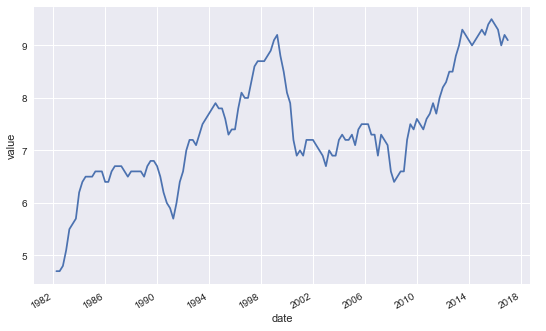

In [61]:
charts = sns.FacetGrid(unemployment[unemployment["region"]=="Hautes-Alpes"], size=5, aspect=1.5)
charts.map(plt.plot, 'date','value').add_legend()
charts.fig.autofmt_xdate()

#### Dataset from 2015 legislative elections 
Link to data http://www.lexpress.fr/actualite/politique/elections/regionales-2015/resultats-elections/france.html



In [62]:
from_csv=pd.read_csv("../data/Round1-2015.csv", sep=";", encoding="latin-1", low_memory=False)
from_csv.info()
from_csv.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679967 entries, 0 to 679966
Data columns (total 13 columns):
NUMTOUR           679967 non-null int64
CODDPT            679967 non-null object
CODSUBCOM         679967 non-null int64
LIBSUBCOM         679967 non-null object
CODBURVOT         679967 non-null object
NBRINS            679967 non-null int64
SUM(M.NBRVOT)     679967 non-null int64
SUM(M.NBREXP)     679967 non-null int64
NUMDEPCAND        679967 non-null int64
NOMPSN            679967 non-null object
PREPSN            679967 non-null object
CODNUA            679967 non-null object
SUM(V.NBRVOIX)    679967 non-null int64
dtypes: int64(7), object(6)
memory usage: 67.4+ MB


NUMTOUR CODDPT  CODSUBCOM                LIBSUBCOM CODBURVOT  NBRINS  \
0        1     01          1  L'Abergement-Clémenciat      0001     584   
1        1     01          1  L'Abergement-Clémenciat      0001     584   
2        1     01          1  L'Abergement-Clémenciat      0001     584   
3        1     01          1  L'Abergement-Clémenciat      0001     584   
4        1     01          1  L'Abergement-Clémenciat      0001     584   

   SUM(M.NBRVOT)  SUM(M.NBREXP)  NUMDEPCAND     NOMPSN        PREPSN CODNUA  \
0            323            320           6  QUEYRANNE     Jean-Jack    LUG   
1            323            320           8  CUKIERMAN        Cécile   LCOM   
2            323            320           5   KOHLHAAS  Jean-Charles   LVEG   
3            323            320           7     BOUDOT    Christophe    LFN   
4            323            320           3     FÉDÈLE         Alain   LDIV   

   SUM(V.NBRVOIX)  
0              76  
1               8  
2              15  
3             109  
4               1

In [63]:
new_header=["NUMTOUR","Dept","CommuneCode","CommuneName", "VotingStation","TotalVoters","VotersVoted",\
"CountedVotes","CandidatePartyNumber","CandidateLast","CandidateFirst","PartyName","VotesforCandidate"]
from_csv.columns=new_header


In [64]:
dept_codes=from_csv["Dept"].unique()
dept_codes[0:5]

array(['01', '02', '03', '04', '05'], dtype=object)

In [65]:
LFN=from_csv[from_csv.PartyName=='LFN']
LFN_dept=LFN[["Dept","CountedVotes","TotalVoters","VotersVoted", \
"VotesforCandidate"]].groupby('Dept').sum()


In [66]:
LFN.head()

NUMTOUR Dept  CommuneCode              CommuneName VotingStation  \
3         1   01            1  L'Abergement-Clémenciat          0001   
16        1   01            2    L'Abergement-de-Varey          0001   
23        1   01            4        Ambérieu-en-Bugey          0001   
31        1   01            4        Ambérieu-en-Bugey          0002   
41        1   01            4        Ambérieu-en-Bugey          0003   

    TotalVoters  VotersVoted  CountedVotes  CandidatePartyNumber  \
3           584          323           320                     7   
16          224          131           127                     7   
23         1011          450           440                     7   
31         1074          499           484                     7   
41         1078          560           544                     7   

   CandidateLast CandidateFirst PartyName  VotesforCandidate  
3         BOUDOT     Christophe       LFN                109  
16        BOUDOT     Christophe       LFN                 30  
23        BOUDOT     Christophe       LFN                152  
31        BOUDOT     Christophe       LFN                151  
41        BOUDOT     Christophe       LFN                180

In [67]:
LFN_dept.head()

CountedVotes  TotalVoters  VotersVoted  VotesforCandidate
Dept                                                           
01          189933       406874       196331              59134
02          200277       374780       207794              87229
03          119872       253703       126944              29543
04           68986       125778        71608              24083
05           59082       108920        61733              19250

In [68]:
LFN_dept["VoteShare"]=LFN_dept["VotesforCandidate"]/LFN_dept["CountedVotes"]
LFN_dept["SpoiltVoteShare"]=1-LFN_dept["CountedVotes"]/LFN_dept["VotersVoted"]
LFN_dept["Turnout"]=LFN_dept["VotersVoted"]/LFN_dept["TotalVoters"]
LFN_dept.head()


CountedVotes  TotalVoters  VotersVoted  VotesforCandidate  VoteShare  \
Dept                                                                         
01          189933       406874       196331              59134   0.311341   
02          200277       374780       207794              87229   0.435542   
03          119872       253703       126944              29543   0.246455   
04           68986       125778        71608              24083   0.349100   
05           59082       108920        61733              19250   0.325818   

      SpoiltVoteShare   Turnout  
Dept                             
01           0.032588  0.482535  
02           0.036175  0.554443  
03           0.055710  0.500365  
04           0.036616  0.569321  
05           0.042943  0.566774

In [69]:
LFN_dept["NationalShr"]=LFN_dept["TotalVoters"].apply(lambda x:x/sum(LFN_dept["TotalVoters"]))
LFN_dept["EffNationalShr"]=LFN_dept["CountedVotes"].apply(lambda x:x/sum(LFN_dept["CountedVotes"]))
LFN_dept.head()

CountedVotes  TotalVoters  VotersVoted  VotesforCandidate  VoteShare  \
Dept                                                                         
01          189933       406874       196331              59134   0.311341   
02          200277       374780       207794              87229   0.435542   
03          119872       253703       126944              29543   0.246455   
04           68986       125778        71608              24083   0.349100   
05           59082       108920        61733              19250   0.325818   

      SpoiltVoteShare   Turnout  NationalShr  EffNationalShr  
Dept                                                          
01           0.032588  0.482535     0.009062        0.008813  
02           0.036175  0.554443     0.008347        0.009293  
03           0.055710  0.500365     0.005650        0.005562  
04           0.036616  0.569321     0.002801        0.003201  
05           0.042943  0.566774     0.002426        0.002741

In [70]:
LFN_dept[["NationalShr","EffNationalShr"]].sum()#check 


NationalShr       1.0
EffNationalShr    1.0
dtype: float64

In [71]:
LFN_dept.sort_values(by="EffNationalShr",ascending=False).head()

CountedVotes  TotalVoters  VotersVoted  VotesforCandidate  VoteShare  \
Dept                                                                         
59          922793      1804756       955559             341833   0.370433   
13          651225      1350579       672911             259612   0.398652   
75          611058      1238566       625943              59002   0.096557   
62          596464      1090448       621649             264731   0.443834   
69          515535      1108472       527659             118917   0.230667   

      SpoiltVoteShare   Turnout  NationalShr  EffNationalShr  
Dept                                                          
59           0.034290  0.529467     0.040195        0.042818  
13           0.032227  0.498239     0.030079        0.030217  
75           0.023780  0.505377     0.027585        0.028353  
62           0.040513  0.570086     0.024286        0.027676  
69           0.022977  0.476024     0.024687        0.023921

In [72]:
LFN_dept.sort_values(by="VoteShare",ascending=False).head()


CountedVotes  TotalVoters  VotersVoted  VotesforCandidate  VoteShare  \
Dept                                                                         
83          392916       780011       404565             175115   0.445681   
62          596464      1090448       621649             264731   0.443834   
84          210017       398416       217515              92884   0.442269   
02          200277       374780       207794              87229   0.435542   
52           63607       136714        67622              26843   0.422013   

      SpoiltVoteShare   Turnout  NationalShr  EffNationalShr  
Dept                                                          
83           0.028794  0.518666     0.017372        0.018231  
62           0.040513  0.570086     0.024286        0.027676  
84           0.034471  0.545949     0.008873        0.009745  
02           0.036175  0.554443     0.008347        0.009293  
52           0.059374  0.494624     0.003045        0.002951

In [73]:
LFN_dept.describe()

CountedVotes   TotalVoters    VotersVoted  VotesforCandidate  \
count      98.000000  9.800000e+01      98.000000          98.000000   
mean   219913.479592  4.581672e+05  229020.755102       61417.489796   
std    156152.633824  3.220324e+05  160788.447630       53937.906131   
min     31027.000000  5.990600e+04   32917.000000        1973.000000   
25%    103457.750000  2.196000e+05  109005.250000       29582.000000   
50%    180602.500000  3.762335e+05  187792.000000       51491.000000   
75%    280874.000000  6.112558e+05  291679.250000       73205.500000   
max    922793.000000  1.804756e+06  955559.000000      341833.000000   

       VoteShare  SpoiltVoteShare    Turnout  NationalShr  EffNationalShr  
count  98.000000        98.000000  98.000000    98.000000       98.000000  
mean    0.279450         0.044553   0.507566     0.010204        0.010204  
std     0.091198         0.011967   0.036728     0.007172        0.007246  
min     0.014047         0.022958   0.369056     0.001334        0.001440  
25%     0.219149         0.035210   0.486245     0.004891        0.004800  
50%     0.278534         0.042615   0.503930     0.008379        0.008380  
75%     0.348506         0.053630   0.529843     0.013614        0.013033  
max     0.445681         0.083273   0.611009     0.040195        0.042818

In [74]:
LFN_dept["DeptNumber"]=LFN_dept.index
LFN_dept.head()

CountedVotes  TotalVoters  VotersVoted  VotesforCandidate  VoteShare  \
Dept                                                                         
01          189933       406874       196331              59134   0.311341   
02          200277       374780       207794              87229   0.435542   
03          119872       253703       126944              29543   0.246455   
04           68986       125778        71608              24083   0.349100   
05           59082       108920        61733              19250   0.325818   

      SpoiltVoteShare   Turnout  NationalShr  EffNationalShr DeptNumber  
Dept                                                                     
01           0.032588  0.482535     0.009062        0.008813         01  
02           0.036175  0.554443     0.008347        0.009293         02  
03           0.055710  0.500365     0.005650        0.005562         03  
04           0.036616  0.569321     0.002801        0.003201         04  
05           0.042943  0.566774     0.002426        0.002741         05

In [75]:
LFN_dept.tail()

CountedVotes  TotalVoters  VotersVoted  VotesforCandidate  VoteShare  \
Dept                                                                         
93          270359       762767       281504              54135   0.200234   
94          336866       780643       347566              56574   0.167942   
95          296657       724034       307146              74378   0.250721   
ZA          140454       313433       147975               1973   0.014047   
ZD          265794       625471       278009               6355   0.023909   

      SpoiltVoteShare   Turnout  NationalShr  EffNationalShr DeptNumber  
Dept                                                                     
93           0.039591  0.369056     0.016988        0.012545         93  
94           0.030786  0.445230     0.017386        0.015631         94  
95           0.034150  0.424215     0.016125        0.013765         95  
ZA           0.050826  0.472110     0.006981        0.006517         ZA  
ZD           0.043937  0.444479     0.013930        0.012333         ZD

##### Mapping department name to department codes 

In [130]:
communemap=pd.read_excel("../data/CommuneProvinceMap.xlsx", encoding="latin-1")
communemap.head()

INSEE code               Department       Prefecture  \
0         01                      Ain  Bourg-en-Bresse   
1         02                    Aisne             Laon   
2         03                   Allier          Moulins   
3         04  Alpes-de-Haute-Provence  Digne-les-Bains   
4         05             Hautes-Alpes              Gap   

                        Region  
0         Auvergne-Rhône-Alpes  
1              Hauts-de-France  
2         Auvergne-Rhône-Alpes  
3   Provence-Alpes-Côte d'Azur  
4   Provence-Alpes-Côte d'Azur

In [131]:
communemap.tail()

INSEE code  Department      Prefecture          Region
97         971  Guadeloupe     Basse-Terre      Guadeloupe
98         972  Martinique  Fort-de-France      Martinique
99         973      Guyane         Cayenne   French Guiana
100        974  La Réunion     Saint-Denis         Réunion
101        976     Mayotte       Mamoudzou         Mayotte

In [132]:
communemap.set_index("INSEE code", inplace = True)
communemap.index = communemap.index.map(str) #Index needs to be made into str

In [133]:
communemap.head()

Department       Prefecture                       Region
01                      Ain  Bourg-en-Bresse         Auvergne-Rhône-Alpes
02                    Aisne             Laon              Hauts-de-France
03                   Allier          Moulins         Auvergne-Rhône-Alpes
04  Alpes-de-Haute-Provence  Digne-les-Bains   Provence-Alpes-Côte d'Azur
05             Hautes-Alpes              Gap   Provence-Alpes-Côte d'Azur

In [134]:
len(set(communemap["Department"]))

102

I want to make sure that I can match the unemployment data to the voting data via the hash index.  So I want the hash index communemap to have the names from the unemployment dataset, because there are some small differences in punctuation. 

For this, I use the fuzzywuzzy library. It scores the differences between two sequences based on the Levenshtein distance, i.e. the min number of edits required to make one string into anothter.

Below I take the list of regions from the unemployment DataFrame: 

In [135]:
correct_dept=set(unemployment["region"])
len(correct_dept)

96

In [136]:
def correcting_name(deptname):
    if deptname in correct_dept:
        return deptname, 100
    new_name, score = process.extractOne(deptname,correct_dept)
    if score<85:
        return deptname, score
    else:
        return new_name, score

communemap["corrected_name"], communemap["score"]= zip(*communemap["Department"].apply(correcting_name))

#adapted code from http://michelleful.github.io/code-blog/2015/05/20/cleaning-text-with-fuzzywuzzy/

In [137]:
communemap[communemap["score"]<100]

Department      Prefecture                Region  \
69M  Metropolis of Lyon            Lyon  Auvergne-Rhône-Alpes   
93    Seine-Saint-Denis         Bobigny         Île-de-France   
971          Guadeloupe     Basse-Terre            Guadeloupe   
972          Martinique  Fort-de-France            Martinique   
973              Guyane         Cayenne         French Guiana   
974          La Réunion     Saint-Denis               Réunion   
976             Mayotte       Mamoudzou               Mayotte   

         corrected_name  score  
69M  Metropolis of Lyon     57  
93                  Ain     90  
971          Guadeloupe     68  
972          Martinique     67  
973              Guyane     60  
974          La Réunion     60  
976             Mayotte     60

Looks like it only corrected Seine-St-Denis. The new name looks completely different, though. We take a look at why in the next cell. 

FuzzyWuzzy also accounts for the 6 extra departments in the communemap hash table but not in the unemployment dataset. For the purposes of this work, we are just going to ignore these extra departments that don't show up in the unemployment data. 


In [138]:
new_name, score = process.extract("Seine-Saint-Denis",correct_dept,limit=2)
print(new_name, score)

('Ain', 90) ('Seine-St-Denis', 90)


In [144]:
communemap.ix["93","corrected_name"]='Seine-St-Denis'
#fixing the name Seine-St-Denis

FYI, the algorithm doesn't penalize the score for this: 

In [86]:
communemap[communemap["Department"]=="Pyrénées-Orientales"]

Department Prefecture     Region       corrected_name  score
66  Pyrénées-Orientales  Perpignan  Occitanie  Pyrénées Orientales    100

The next step is to do the same thing for the index/dept numbers between the LFN dataset and the communemap hash index.

In [145]:
correct_dept=set(LFN_dept.index)
communemap["index"]=communemap.index
communemap["corrected_number"], communemap["number_score"]= zip(*communemap["index"].apply(correcting_name))
communemap[communemap["number_score"]<100]

Department      Prefecture                Region  \
69M  Metropolis of Lyon            Lyon  Auvergne-Rhône-Alpes   
971          Guadeloupe     Basse-Terre            Guadeloupe   
972          Martinique  Fort-de-France            Martinique   
973              Guyane         Cayenne         French Guiana   
974          La Réunion     Saint-Denis               Réunion   
976             Mayotte       Mamoudzou               Mayotte   

         corrected_name  score index corrected_number  number_score  
69M  Metropolis of Lyon     57   69M               69            90  
971          Guadeloupe     68   971               71            90  
972          Martinique     67   972               72            90  
973              Guyane     60   973               73            90  
974          La Réunion     60   974               74            90  
976             Mayotte     60   976               76            90

The same 6 departments show up. We are going to ignore them anyway but it is good to know that the other index numbers will match. 


In the hashtable, I only want to keep corrected_name and corrected_number to LFN. 

In [146]:
col_list=["corrected_name", "corrected_number"]
newlist=communemap[col_list]

In [147]:
complete_data=LFN_dept.merge(newlist, how="left", left_index=True, right_on="corrected_number")

In [148]:
complete_data.head()

CountedVotes  TotalVoters  VotersVoted  VotesforCandidate  VoteShare  \
01        189933       406874       196331              59134   0.311341   
02        200277       374780       207794              87229   0.435542   
03        119872       253703       126944              29543   0.246455   
04         68986       125778        71608              24083   0.349100   
05         59082       108920        61733              19250   0.325818   

    SpoiltVoteShare   Turnout  NationalShr  EffNationalShr DeptNumber  \
01         0.032588  0.482535     0.009062        0.008813         01   
02         0.036175  0.554443     0.008347        0.009293         02   
03         0.055710  0.500365     0.005650        0.005562         03   
04         0.036616  0.569321     0.002801        0.003201         04   
05         0.042943  0.566774     0.002426        0.002741         05   

             corrected_name corrected_number  
01                      Ain               01  
02                    Aisne               02  
03                   Allier               03  
04  Alpes-de-Haute-Provence               04  
05             Hautes-Alpes               05

I want to compare, among other things, the FN's voting share vs. unemployment rate at the end of 2015. 

In [149]:
firstpass=unemployment[unemployment["date"]=="2015-12-31"].merge(complete_data,how="left", left_on="region", right_on="corrected_name")
firstpass.head()

date  year  quarter                   region  value  CountedVotes  \
0 2015-12-31  2015      4.0                  Aveyron    7.5        111221   
1 2015-12-31  2015      4.0                      Ain    7.3        189933   
2 2015-12-31  2015      4.0                    Aisne   13.9        200277   
3 2015-12-31  2015      4.0                   Allier   10.7        119872   
4 2015-12-31  2015      4.0  Alpes-de-Haute-Provence   11.6         68986   

   TotalVoters  VotersVoted  VotesforCandidate  VoteShare  SpoiltVoteShare  \
0       218654       118433              24181   0.217414         0.060895   
1       406874       196331              59134   0.311341         0.032588   
2       374780       207794              87229   0.435542         0.036175   
3       253703       126944              29543   0.246455         0.055710   
4       125778        71608              24083   0.349100         0.036616   

    Turnout  NationalShr  EffNationalShr DeptNumber           corrected_name  \
0  0.541646     0.004870        0.005161         12                  Aveyron   
1  0.482535     0.009062        0.008813         01                      Ain   
2  0.554443     0.008347        0.009293         02                    Aisne   
3  0.500365     0.005650        0.005562         03                   Allier   
4  0.569321     0.002801        0.003201         04  Alpes-de-Haute-Provence   

  corrected_number  
0               12  
1               01  
2               02  
3               03  
4               04

In [150]:
columns_corr=["corrected_name", "corrected_number","value", "NationalShr","EffNationalShr","VoteShare","Turnout"]
new_data = firstpass[columns_corr]
new_data["unemployment"]=new_data["value"]/100
new_data.drop("value",axis=1, inplace=True)
new_data.head()

/Users/annjieching/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/annjieching/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


corrected_name corrected_number  NationalShr  EffNationalShr  \
0                  Aveyron               12     0.004870        0.005161   
1                      Ain               01     0.009062        0.008813   
2                    Aisne               02     0.008347        0.009293   
3                   Allier               03     0.005650        0.005562   
4  Alpes-de-Haute-Provence               04     0.002801        0.003201   

   VoteShare   Turnout  unemployment  
0   0.217414  0.541646         0.075  
1   0.311341  0.482535         0.073  
2   0.435542  0.554443         0.139  
3   0.246455  0.500365         0.107  
4   0.349100  0.569321         0.116

In [151]:
new_data_corr=new_data.corr(method='spearman')

I use spearman correlation because I don't want to assume the data is normal.  

In [224]:
new_data_corr

NationalShr  EffNationalShr  VoteShare   Turnout  unemployment
NationalShr        1.000000        0.994927  -0.054693 -0.355697      0.002456
EffNationalShr     0.994927        1.000000  -0.048087 -0.282434      0.022757
VoteShare         -0.054693       -0.048087   1.000000  0.068638      0.572915
Turnout           -0.355697       -0.282434   0.068638  1.000000      0.246266
unemployment       0.002456        0.022757   0.572915  0.246266      1.000000

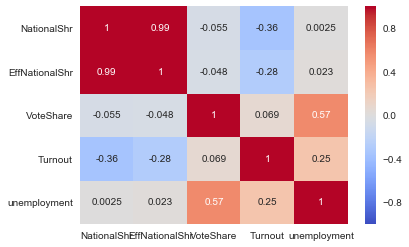

In [217]:
sns.heatmap(new_data_corr,cmap='coolwarm',annot=True)

Unemployment and VoteShare look interesting. 

In [153]:
compare=["VoteShare","unemployment"]
stats.spearmanr(new_data[compare])

SpearmanrResult(correlation=0.5729145561121205, pvalue=1.0632777707038104e-09)

Looks like VoteShare and unemployment are positively correlated at a statistically significant level. 

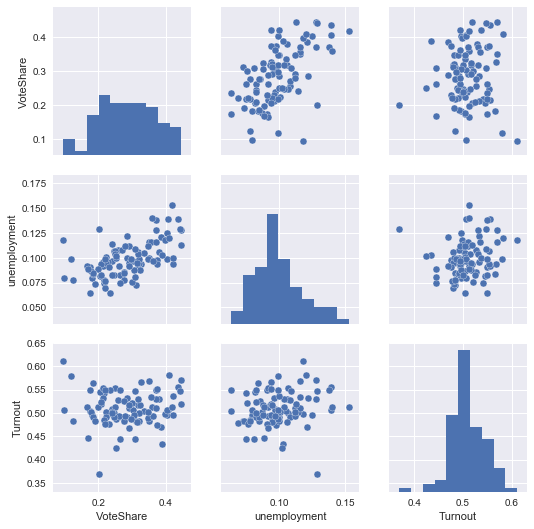

In [154]:
compare=["VoteShare","unemployment","Turnout"]
plot=sns.pairplot(new_data[compare])

Curious affect of the data: the histogram shows unemployment spiking in the bin right below 10%. Reminds me of how there is a spike of companies that report $0 or less earnings to the IRS. 

Admittedly, a spike of >50% in the voting turnout is not as 'fake' as it sounds.

The other scatterplots look uninteresting and we focus on VoteShare and Unemployment as the key relationship we are interested in. 

Last part - for fun, let's plot VoteShare and Unemployment by Department on a map of France:

In [175]:
state_geo = '../data/departements.geojson'

with open(state_geo) as data_file:    
    data_ = json.load(data_file)
l_dep=[]    
for feature in data_['features']:
    l_dep.append(feature['properties']['code'])
l=[]
for element in l_dep:
    l.append(str(element))
l_missing=[]
for element in l:
    if str(element) not in list(new_data["corrected_number"]):
        l_missing.append(element)
        
geo_path=state_geo

#Let Folium determine the scale
map_ = folium.Map(location=[47.144417, 2.495796], zoom_start=5)
map_.choropleth(geo_path, data=new_data,
             columns=['corrected_number', 'VoteShare'],
             key_on='feature.properties.code',
             fill_color='BuGn',fill_opacity=0.8, line_opacity=0.2,
            legend_name='FN Vote Share 2015(%)')
map_

In [174]:
map_ = folium.Map(location=[47.144417, 2.495796], zoom_start=5)
map_.choropleth(geo_path, data=new_data,
             columns=['corrected_number', 'unemployment'],
             key_on='feature.properties.code',
             fill_color='PuRd',fill_opacity=0.8, line_opacity=0.2,
            legend_name='Unemployment 2015 (%)')
map_

This confirms what the correlation test tells us!

Following, we take an excursion into the future, looking at **2016 unemployment and Le Pen's vote in the final round**:

In [181]:
unemploy16=unemployment[unemployment["date"]=="2016-12-31"].merge(newlist, how="right", left_on="region", right_on="corrected_name")

In [213]:
unemploy16.head()

date  year  quarter                   region  value  \
0 2016-12-31  2016      4.0                  Aveyron    7.3   
1 2016-12-31  2016      4.0                      Ain    7.3   
2 2016-12-31  2016      4.0                    Aisne   13.7   
3 2016-12-31  2016      4.0                   Allier   10.4   
4 2016-12-31  2016      4.0  Alpes-de-Haute-Provence   11.6   

            corrected_name corrected_number  
0                  Aveyron               12  
1                      Ain               01  
2                    Aisne               02  
3                   Allier               03  
4  Alpes-de-Haute-Provence               04

In [209]:
map_ = folium.Map(location=[47.144417, 2.495796], zoom_start=5)
map_.choropleth(geo_path, data=unemploy16,
             columns=['corrected_number', 'value'],
             key_on='feature.properties.code',
             fill_color='PuRd',fill_opacity=0.8, line_opacity=0.2,
            legend_name='Unemployment 2016 (%)')
map_

Loading a simple dataset I scraped off wikipedia that gives me the % win per candidate in each department:

In [210]:
electionresults=pd.read_csv("../data/2017csv.csv",  sep=',',encoding="utf-8")
electionresults.head()

Votes  Macron  Le Pen
0                      Ain   60.94   39.06
1                    Aisne   47.09   52.91
2                   Allier   63.90   36.10
3  Alpes-de-Haute-Provence   58.46   41.54
4          Alpes-Maritimes   55.35   44.65

In [211]:
electionresults=electionresults.merge(newlist, how="right", left_on="Votes", right_on="corrected_name")
electionresults.head()

Votes  Macron  Le Pen           corrected_name  \
0                      Ain   60.94   39.06                      Ain   
1                    Aisne   47.09   52.91                    Aisne   
2                   Allier   63.90   36.10                   Allier   
3  Alpes-de-Haute-Provence   58.46   41.54  Alpes-de-Haute-Provence   
4          Alpes-Maritimes   55.35   44.65          Alpes-Maritimes   

  corrected_number  
0               01  
1               02  
2               03  
3               04  
4               06

In [214]:
map_ = folium.Map(location=[47.144417, 2.495796], zoom_start=5)
map_.choropleth(geo_path, data=electionresults,
             columns=['corrected_number', 'Le Pen'],
             key_on='feature.properties.code',
             fill_color='BuPu',fill_opacity=.9, line_opacity=0.2,
            legend_name='Le Pen vote share 2017 (%)')
map_

It looks like the same correlation has played out this year. Le Pen's support is stronger where unemployment is higher, although this did not tip her to a victory. 

In [244]:
#new df containing both unemployment and vote share 

newcomp=electionresults.merge(unemploy16, how="inner", on="corrected_number")
newcomp.head()

compare=["value","Le Pen"]
newcomp[compare].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 2 columns):
value     102 non-null float64
Le Pen    106 non-null float64
dtypes: float64(2)
memory usage: 2.7 KB


There are some missing data, so we drop those rows. 

/Users/annjieching/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


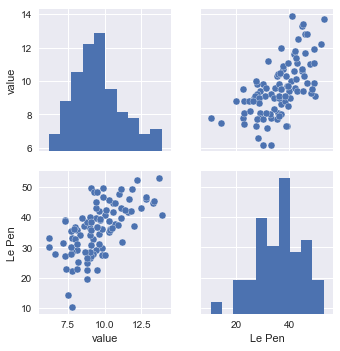

In [254]:
comparison17=newcomp[compare]
comparison17.dropna(how='any', inplace=True)
sns.pairplot(comparison17)

In [255]:
stats.spearmanr(comparison17)

SpearmanrResult(correlation=0.6439570949136233, pvalue=1.1171919816143585e-12)

Yes, there is a statistically significant correlation between unemployment and the vote for Marine Le Pen in 2017.  